In [ ]:
!pip install torchmetrics[image]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import torch
from torch import nn
import math
from typing import Optional, Tuple, Union, List
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
#from torchmetrics.image.fid import FrechetInceptionDistance
import random
import os
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import shutil

#Sandbox

In [ ]:
import torch
_ = torch.manual_seed(123)
from torchmetrics.image.fid import FrechetInceptionDistance
fid = FrechetInceptionDistance(feature=64)
# generate two slightly overlapping image intensity distributions
imgs_dist1 = torch.randint(0, 200, (64, 3, 20, 20), dtype=torch.uint8)
imgs_dist2 = torch.randint(100, 255, (64, 3, 20, 20), dtype=torch.uint8)
fid.update(imgs_dist1, real=True)
fid.update(imgs_dist2, real=False)
fid.compute()

tensor(6.2166)

In [ ]:
def read_tesr(path):
    voxels = []
    n_cells = 0
    size = 0
    with open(path, "r") as f:
        lines = f.readlines()
    read_mode = "base"
    for s in lines:
        if s.find("**cell") != -1:
            read_mode = "cell"
            continue
        elif s.find("**data") != -1:
            read_mode = "pre_data"
            continue
        elif s.find("***end") != -1:
            break
        elif s.find("**general") != -1:
            read_mode = "pre_general"
            continue
        if read_mode == "pre_data":
            read_mode = "data"
            continue
        elif read_mode == "pre_general":
            read_mode = "general"
            continue
        elif read_mode == "cell":
            n_cells = int(s.strip())
            read_mode = "base"
        elif read_mode == "data":
            new_voxels = [int(i) for i in s.strip().split(" ")]
            voxels.extend(new_voxels)
        elif read_mode == "general":
            size = [int(i) for i in s.strip().split(" ")][0]
            read_mode = "base"
    tess = np.zeros((size, size, size))
    counter = 0
    for i in range(size):
      for j in range(size):
        for k in range(size):
          tess[k, j, i] = int(voxels[counter]/n_cells*255)
          counter += 1
    return tess


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/structure_generation/dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset/n10-id5499.tesr  
  inflating: dataset/n10-id55.tesr   
  inflating: dataset/n10-id550.tesr  
  inflating: dataset/n10-id5500.tesr  
  inflating: dataset/n10-id5501.tesr  
  inflating: dataset/n10-id5502.tesr  
  inflating: dataset/n10-id5503.tesr  
  inflating: dataset/n10-id5504.tesr  
  inflating: dataset/n10-id5505.tesr  
  inflating: dataset/n10-id5506.tesr  
  inflating: dataset/n10-id5507.tesr  
  inflating: dataset/n10-id5508.tesr  
  inflating: dataset/n10-id5509.tesr  
  inflating: dataset/n10-id551.tesr  
  inflating: dataset/n10-id5510.tesr  
  inflating: dataset/n10-id5511.tesr  
  inflating: dataset/n10-id5512.tesr  
  inflating: dataset/n10-id5513.tesr  
  inflating: dataset/n10-id5514.tesr  
  inflating: dataset/n10-id5515.tesr  
  inflating: dataset/n10-id5516.tesr  
  inflating: dataset/n10-id5517.tesr  
  inflating: dataset/n10-id5518.tesr  
  inflating: dataset/n10-id5519.tesr  

In [ ]:
import os
from tqdm.notebook import tqdm
dataset = []
for name in tqdm(os.listdir("/content/dataset")[:3]):
  path = f"/content/dataset/{name}"
  tess = read_tesr(path)
  dataset.append(tess)

  0%|          | 0/3 [00:00<?, ?it/s]

(32, 32, 32, 4)


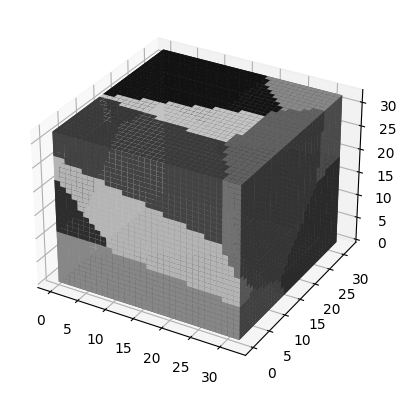

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sample = np.ones_like(dataset[0])
colors = dataset[0][:,:,:,np.newaxis].repeat(3, axis=3)/255
colors = np.concatenate([colors, np.ones((32, 32, 32, 1))], axis=3)
print(colors.shape)
ax.voxels(sample, facecolors=colors)
plt.show()

#Data

In [ ]:
class TesselationDataset(Dataset):
    def __init__(self, params):
        self.tess_dir = params["tess_dir"]
        self.names = params.get("names", os.listdir(self.tess_dir))

    def __getitem__(self, ind):
        name = self.names[ind]
        path = f"{self.tess_dir}/{name}"
        tess = self.read_tesr(path)
        tess_tensor = torch.from_numpy(tess)[None,:,:,:].type("torch.FloatTensor")
        noise = noise = torch.randn_like(tess_tensor)

        batch = {
            "train":{
                "gt_sample":tess_tensor,
            },
            "val":{
                "noise":noise
            },
            "labels":{
                "gt_sample":tess_tensor,
            }
        }

        return batch

    def __len__(self) -> int:
        return len(self.names)
    def show_samples(self, indexes):
      fig = plt.figure()
      for ind in indexes:
        name = self.names[ind]
        path = f"{self.tess_dir}/{name}"
        sample = self.read_tesr(path)
        sample = (sample*255).astype("uint8")

        ax = fig.add_subplot(projection='3d')
        colors = sample[:,:,:,np.newaxis].repeat(3, axis=3)/255
        colors = np.concatenate([colors, np.ones((*sample.shape, 1))], axis=3)
        ax.voxels(sample, facecolors=colors)
      plt.show()
    def read_tesr(self, path):
      voxels = []
      n_cells = 0
      size = 0
      with open(path, "r") as f:
          lines = f.readlines()
      read_mode = "base"
      for s in lines:
          if s.find("**cell") != -1:
              read_mode = "cell"
              continue
          elif s.find("**data") != -1:
              read_mode = "pre_data"
              continue
          elif s.find("***end") != -1:
              break
          elif s.find("**general") != -1:
              read_mode = "pre_general"
              continue
          if read_mode == "pre_data":
              read_mode = "data"
              continue
          elif read_mode == "pre_general":
              read_mode = "general"
              continue
          elif read_mode == "cell":
              n_cells = int(s.strip())
              read_mode = "base"
          elif read_mode == "data":
              new_voxels = [int(i) for i in s.strip().split(" ")]
              voxels.extend(new_voxels)
          elif read_mode == "general":
              size = [int(i) for i in s.strip().split(" ")][0]
              read_mode = "base"
      tess = np.zeros((size, size, size))
      counter = 0
      for i in range(size):
        for j in range(size):
          for k in range(size):
            tess[k, j, i] = voxels[counter]/n_cells
            counter += 1
      return tess



def collate_fn(batch, dataset):
  samples = torch.cat([b["train"]["gt_sample"][None,:,:,:,:] for b in batch], dim=0)
  noises = torch.cat([b["val"]["noise"][None,:,:,:,:] for b in batch], dim=0)
  batch = {
      "train":{
          "gt_sample":samples,
      },
      "val":{
          "noise":noises
      },
      "labels":{
          "gt_sample":samples,
      }
  }
  return batch

#Trainer

In [ ]:
class Trainer():
  def __init__(self, params):
    torch.manual_seed(42)
    self.train_dataloader = params["train_dataloader"]
    self.val_dataloader = params["val_dataloader"]
    self.score = params["score"]
    self.train_score_computing_frequency = params.get("train_score_computing_frequency", 1)
    self.optimizer = params["optimizer"]
    self.optimizer_args = params["optimizer_args"]
    self.scheduler = params.get("scheduler", None)
    self.scheduler_args = params.get("scheduler_args", None)
    self.freezer = params.get("freezer", None)
    self.freezer_args = params.get("freezer_args", None)
    self.training_controller = params.get("training_controller", None)
    self.show_outputs = params.get("show_outputs", False)
    self.show_outputs_every = params.get("show_outputs_every", 1)
    self.n_outputs = params.get("n_outputs", 2)
    self.n_epochs = params["n_epochs"]
    self.device = params["device"]
    self.backup_path = params.get("backup_path", None)
    self.history = {
        "train_loss":[],
        "train_score":[],
        "val_loss":[],
        "val_score":[]
    }
  def train(self, model, verbose=True):
    model = model.to(self.device)
    optimizer = self.optimizer(model.parameters(), **self.optimizer_args)
    scheduler = None
    if self.scheduler != None and self.scheduler_args != None:
      scheduler = self.scheduler(optimizer, **self.scheduler_args)
    freezer = None
    if self.freezer != None and self.freezer_args != None:
      freezer = self.freezer(model, **self.freezer_args)

    for epoch in range(self.n_epochs):
      #Training
      model.train()
      if freezer != None:
        freezer.step()
      train_loss = 0
      train_score = 0
      steps = 0
      train_pbar = tqdm(self.train_dataloader, desc="Training")

      local_losses = []
      local_scores = []
      for batch in train_pbar:
        optimizer.zero_grad()
        train_batch = self.device_dict(batch["train"])
        loss = model(train_batch)
        loss.backward()
        local_losses.append(loss.item())

        val_batch = self.device_dict(batch["val"])
        labels = self.device_dict(batch["labels"])

        if self.score != None:
          preds = model.predict(val_batch)
          if steps % self.train_score_computing_frequency == 0:
            score = self.score(preds, labels)
            local_scores.append(score)

        if self.training_controller != None:
          self.training_controller.update_batch(model=model, optimizer=optimizer,
                                                scheduler=scheduler, freezer=freezer,
                                                losses=local_losses, scores=local_scores)
        optimizer.step()

        display_loss = round(sum(local_losses)/len(local_losses), 5)
        train_pbar.set_description("Training. Loss: %s" % display_loss)
        steps += 1



      train_loss = sum(local_losses)/len(local_losses)
      if len(local_scores) > 0:
        train_score = sum(local_scores)/len(local_scores)

      if scheduler != None:
        scheduler.step()

      #Validation
      model.eval()
      val_loss = 0
      val_score = 0
      for batch in tqdm(self.val_dataloader, desc="Validation"):
        with torch.no_grad():
          train_batch = self.device_dict(batch["train"])

          optimizer.zero_grad()
          loss = model(train_batch)
          val_loss += loss.item()/len(self.val_dataloader)

          val_batch = train_batch = self.device_dict(batch["val"])
          labels = train_batch = self.device_dict(batch["labels"])

          if self.score != None:
            preds = model.predict(val_batch)
            score = self.score(preds, labels)
            val_score += score/(len(self.val_dataloader))

      self.history["train_loss"].append(train_loss)
      self.history["train_score"].append(train_score)
      self.history["val_loss"].append(val_loss)
      self.history["val_score"].append(val_score)

      if self.training_controller != None:
          self.training_controller.update_epoch(model=model, optimizer=optimizer,
                                                scheduler=scheduler, freezer=freezer,
                                                losses=self.history["train_loss"], scores=self.history["train_score"])

      if verbose:
        print(f"Epoch {epoch+1}. Train loss: {train_loss}, val loss: {val_loss}, train score: {train_score}, val score: {val_score}")

      if self.show_outputs == True and epoch % self.show_outputs_every == 0:
        self.show_outputs_fn(model, self.val_dataloader)

      if self.backup_path != None:
        torch.save(model, self.backup_path)
      self.save_history()

  def save_history(self):
    plt.ioff()
    fig, ax = plt.subplots()
    ax.plot(range(len(self.history["train_loss"])), self.history["train_loss"], label="Train")
    ax.plot(range(len(self.history["val_loss"])), self.history["val_loss"], label="Val")
    fig.savefig("Losses.pdf")

    fig, ax = plt.subplots()
    ax.plot(range(len(self.history["train_score"])), self.history["train_score"], label="Train")
    ax.plot(range(len(self.history["val_score"])), self.history["val_score"], label="Val")
    fig.savefig("Scores.pdf")

  def plot_lr_schedule(self):
    steps = [self.optimizer_args["lr"]]
    if self.scheduler == None or self.scheduler_args == None:
      steps = [self.optimizer_args["lr"] for i in range(self.n_epochs)]
    else:
      dummyModel = nn.Linear(10, 10)
      dummyOptimizer = self.optimizer(dummyModel.parameters(), **self.optimizer_args)
      scheduler = scheduler = self.scheduler(dummyOptimizer, **self.scheduler_args)
      for i in range(1, self.n_epochs):
        dummyOptimizer.step()
        scheduler.step()
        lr = scheduler.get_last_lr()[0]
        steps.append(lr)
    fig, ax = plt.subplots()
    ax.plot(range(len(steps)), steps)
    plt.show()
  def device_dict(self, dictionary):
    for k in dictionary.keys():
      if type(dictionary[k]) == type({}):
        dictionary[k] = self.device_dict(dictionary[k])
      else:
        dictionary[k] = dictionary[k].to(self.device)
    return dictionary
  def show_outputs_fn(self, model, dataloader):
    dataset = dataloader.dataset
    collate_fn = dataloader.collate_fn
    indexes = random.sample(range(len(dataset)), self.n_outputs)
    inputs = [dataset[i] for i in indexes]
    processed = collate_fn(inputs)
    batch = self.device_dict(processed)
    print("Output samples:\n")
    model.show_outputs(batch["val"])
    dataset.show_samples(indexes)

In [ ]:
class TrainingController():
  def __init__(self, params):
    self.model_backup_freq = params.get("model_backup_freq", 100)
    self.loss_increasing_iters = params.get("loss_increasing_iters", 0)
    self.model_backup_dir = params.get("model_backup_dir", "model_backups")
    if os.path.exists(self.model_backup_dir):
      if len(os.listdir(self.model_backup_dir)) > 0:
        shutil.rmtree(self.model_backup_dir)
        os.makedirs(self.model_backup_dir)
    else:
      os.makedirs(self.model_backup_dir)
    self.backup_paths = []
    self.verifications_count = 0
    self.epochs_count = 0
    self.model_states = []
    self.optimizer_states = []

  def update_batch(self, model, optimizer, scheduler, freezer, losses, scores):
    if len(losses) < 2:
      self.end_batch_verification(model, optimizer)
      return

    grads_validation = self.validate_grads(model)
    if grads_validation == False:
      optimizer.zero_grad()
      return

    if losses[-1] == float("nan"):
      optimizer.zero_grad()
      losses.pop()
      return

    loss_increasing_count = 0
    last_loss = losses[-1]
    for i in range(len(losses)-1, -1, -1):
      loss = losses[i]
      if loss > last_loss:
        loss_increasing_count += 1
        if loss_increasing_count > self.loss_increasing_iters:
          model.load_state_dict(self.model_states[-1])
          optimizer.load_state_dict(self.optimizer_states[-1])
          break
      last_loss = loss

    self.end_batch_verification(model, optimizer)
  def update_epoch(self, model, optimizer, scheduler, freezer, losses, scores):
    self.epochs_count += 1
  def end_batch_verification(self, model, optimizer):
    if self.verifications_count % self.model_backup_freq == 0:
      """new_path = f"backup_{len(self.backup_paths)}.pth"
      torch.save(model.state_dict(), os.path.join(self.model_backup_dir, new_path))
      self.backup_paths.append(os.path.join(self.model_backup_dir, new_path))"""
      self.model_states.append(model.state_dict())
      self.optimizer_states.append(optimizer.state_dict())
    self.verifications_count += 1
  def validate_grads(self, model):
    result = True
    for p in model.parameters():
      if p.grad == None:
        continue
      isna = torch.isnan(p.grad)
      if isna.any().item():
        result = False
        break
    return result

#Metrics

In [ ]:
class SliceFIDScore():
  def __init__(self, params):
    self.n_slices = params.get("n_slices", 1)
    self.fid = FrechetInceptionDistance(feature=64)
  def __call__(self, preds, labels):
    gt_samples = labels["gt_sample"].detach().cpu().numpy()
    gen_samples = preds["gen_sample"].detach().cpu().numpy()

    gt_slices = None
    gen_slices = None
    for i in range(self.n_slices):
      sample_shape = gt_samples.shape[2]
      indexes = random.sample(range(sample_shape), 3)
      gt_slices_local = torch.cat([gt_samples[:,:,indexes[0],:,:].squeeze(),
                             gt_samples[:,:,indexes[1],:,:].squeeze(),
                             gt_samples[:,:,indexes[2],:,:].squeeze()], dim=0)
      gen_slices_local = torch.cat([gen_samples[:,:,indexes[0],:,:].squeeze(),
                             gen_samples[:,:,indexes[1],:,:].squeeze(),
                             gen_samples[:,:,indexes[2],:,:].squeeze()], dim=0)
      if gt_slices == None:
        gt_slices = gt_slices_local
        gen_slices = gen_slices_local
      else:
        gt_slices = torch.cat([gt_slices, gt_slices_local], dim=0)
        gen_slices = torch.cat([gen_slices, gen_slices_local], dim=0)

    fid.update(gt_slices, real=True)
    fid.update(gen_slices, real=False)
    score = fid.compute()
    return score.item()

#Model

In [ ]:
class DDPM(nn.Module):
  def __init__(self, params):
    super().__init__()
    self.device = params["device"]
    self.sample_channels = params.get("sample_channels", 1)
    self.unet_channels = params.get("unet_channels", 64)
    self.sample_shape = params.get("sample_shape", (20, 20, 20))
    self.unet_n_blocks = params.get("unet_n_blocks", 2)
    self.channels_mults = params.get("channels_mults", (1,2,2,4))
    self.attention_indicators = params.get("attention_indicators", (False, False, True, True))
    self.eps_model = UNet3D(image_channels = self.sample_channels, n_channels = self.unet_channels, ch_mults = self.channels_mults,
                     is_attn = self.attention_indicators, n_blocks = self.unet_n_blocks)

    self.n_steps = params.get("n_steps", 1000)
    self.betas_range = params.get("betas_range", (0.0001, 0.002))
    self.beta = torch.linspace(*self.betas_range, self.n_steps).to(self.device)
    self.alpha = 1 - self.beta
    self.alpha_bar = torch.cumprod(self.alpha, dim=0)
    self.sigma2 = self.beta
    self.loss = nn.MSELoss()

  def forward(self, batch):
    x0 = batch["gt_sample"]
    batch_size = x0.shape[0]
    t = torch.randint(0, self.n_steps, (batch_size,), device=x0.device, dtype=torch.long)
    noise = torch.randn_like(x0).to(x0.device)

    xt = self.q_xt_x0_sample(x0, t, eps=noise)
    eps_theta = self.eps_model(xt, t)
    loss = self.loss(noise, eps_theta)
    return loss
  def predict(self, batch):
    with torch.no_grad():
      x = batch["noise"]
      for i in range(self.n_steps):
        t = self.n_steps - i - 1
        x = self.p_xt1_xt_sample(x, x.new_full((x.shape[0],), t, dtype=torch.long))
      output = {
          "gen_sample":x
      }
    return output
  def show_outputs(self, batch):
    x = self.predict(batch)["gen_sample"][:,0,:,:,:].squeeze(1)
    x = abs(x + abs(x.min()))
    x = (x/x.max()*255).type("torch.LongTensor")

    sample = x[0].detach().cpu().numpy()
    fig = plt.figure()
    for i in range(x.shape[0]):
      tess = x[i].detach().cpu().numpy()[:,:,:,np.newaxis].repeat(3, axis=3)/255
      color = np.concatenate([tess, np.ones((*self.sample_shape, 1))], axis=3)
      ax = fig.add_subplot(projection='3d')
      ax.voxels(sample, facecolors=color)
    plt.show()
    return ""
  def gather(self, consts: torch.Tensor, t: torch.Tensor):
    c = consts.gather(-1, t)
    return c.reshape(-1, 1, 1, 1, 1)
  def q_xt_x0(self, x0, t):
    mean = self.gather(self.alpha_bar, t) ** 0.5 * x0
    var = 1 - self.gather(self.alpha_bar, t)
    return mean, var
  def q_xt_x0_sample(self, x0, t, eps=None):
    if eps is None:
      eps = torch.randn_like(x0).to(x0.device)
    mean, var = self.q_xt_x0(x0, t)
    return mean + (var ** 0.5) * eps
  def p_xt1_xt_sample(self, xt: torch.Tensor, t: torch.Tensor):
    eps_theta = self.eps_model(xt, t)
    alpha_bar = self.gather(self.alpha_bar, t)
    alpha = self.gather(self.alpha, t)
    eps_coef = (1 - alpha) / (1 - alpha_bar) ** .5
    mean = 1 / (alpha ** 0.5) * (xt - eps_coef * eps_theta)
    var = self.gather(self.sigma2, t)
    eps = torch.randn(xt.shape, device=xt.device)
    return mean + (var ** .5) * eps

In [ ]:
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


class TimeEmbedding(nn.Module):
    def __init__(self, n_channels: int):
        super().__init__()
        self.n_channels = n_channels
        self.lin1 = nn.Linear(self.n_channels // 4, self.n_channels)
        self.act = Swish()
        self.lin2 = nn.Linear(self.n_channels, self.n_channels)

    def forward(self, t: torch.Tensor):
        half_dim = self.n_channels // 8
        emb = math.log(10_000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=t.device) * -emb)
        emb = t[:, None] * emb[None, :]
        emb = torch.cat((emb.sin(), emb.cos()), dim=1)

        emb = self.act(self.lin1(emb))
        emb = self.lin2(emb)
        return emb


class ResidualBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, time_channels: int,
                 n_groups: int = 32, dropout: float = 0.1, n_dim = 2):
        super().__init__()
        self.norm1 = nn.GroupNorm(n_groups, in_channels)
        self.act1 = Swish()
        self.conv1 = nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1)

        self.norm2 = nn.GroupNorm(n_groups, out_channels)
        self.act2 = Swish()
        self.conv2 = nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1)

        if in_channels != out_channels:
            self.shortcut = nn.Conv3d(in_channels, out_channels, kernel_size=1)
        else:
            self.shortcut = nn.Identity()

        self.time_emb = nn.Linear(time_channels, out_channels)
        self.time_act = Swish()

        self.dropout = nn.Dropout(dropout)

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        #x: [batch_size, in_channels, *sample_shape]
        #t: [batch_size, time_channels]

        h = self.conv1(self.act1(self.norm1(x)))
        h += self.time_emb(self.time_act(t))[:, :, None, None, None]
        h = self.conv2(self.dropout(self.act2(self.norm2(h))))

        return h + self.shortcut(x)


class AttentionBlock(nn.Module):
    def __init__(self, n_channels: int, n_heads: int = 1, d_k: int = None, n_groups: int = 32):
        super().__init__()

        if d_k is None:
            d_k = n_channels
        self.norm = nn.GroupNorm(n_groups, n_channels)
        self.projection = nn.Linear(n_channels, n_heads * d_k * 3)
        self.output = nn.Linear(n_heads * d_k, n_channels)
        self.scale = d_k ** -0.5
        self.n_heads = n_heads
        self.d_k = d_k

    def forward(self, x: torch.Tensor, t: Optional[torch.Tensor] = None):
        #x: [batch_size, in_channels, *sample_shape]
        #t: [batch_size, time_channels]
        _ = t
        batch_size = x.shape[0]
        n_channels = x.shape[1]
        sample_shape = x.shape[2:]
        x = x.view(batch_size, n_channels, -1).permute(0, 2, 1)
        #x: [batch_size, seq, n_channels]
        qkv = self.projection(x).view(batch_size, -1, self.n_heads, 3 * self.d_k)
        #qkv: [batch_size, seq, n_heads, 3 * d_k]
        q, k, v = torch.chunk(qkv, 3, dim=-1)
        #q,k,v: [batch_size, seq, n_heads, d_k]
        attn = torch.einsum('bihd,bjhd->bijh', q, k) * self.scale
        attn = attn.softmax(dim=2)
        res = torch.einsum('bijh,bjhd->bihd', attn, v)
        # Reshape to `[batch_size, seq, n_heads * d_k]`
        res = res.view(batch_size, -1, self.n_heads * self.d_k)
        #res: [batch_size, seq, n_heads * d_k]
        # Transform to `[batch_size, seq, n_channels]`
        res = self.output(res)
        #res: [batch_size, seq, n_channels]

        res += x

        res = res.permute(0, 2, 1).view(batch_size, n_channels, *sample_shape)
        #res: [batch_size, in_channels, *sample_shape]
        return res


class DownBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, time_channels: int, has_attn: bool):
        super().__init__()
        self.res = ResidualBlock(in_channels, out_channels, time_channels)
        if has_attn:
            self.attn = AttentionBlock(out_channels)
        else:
            self.attn = nn.Identity()

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        x = self.res(x, t)
        x = self.attn(x)
        return x


class UpBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, time_channels: int, has_attn: bool):
        super().__init__()
        self.res = ResidualBlock(in_channels + out_channels, out_channels, time_channels)
        if has_attn:
            self.attn = AttentionBlock(out_channels)
        else:
            self.attn = nn.Identity()

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        x = self.res(x, t)
        x = self.attn(x)
        return x


class MiddleBlock(nn.Module):
    def __init__(self, n_channels: int, time_channels: int):
        super().__init__()
        self.res1 = ResidualBlock(n_channels, n_channels, time_channels)
        self.attn = AttentionBlock(n_channels)
        self.res2 = ResidualBlock(n_channels, n_channels, time_channels)

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        x = self.res1(x, t)
        x = self.attn(x)
        x = self.res2(x, t)
        return x


class Upsample(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.conv = nn.ConvTranspose3d(n_channels, n_channels, 4, 2, 1)

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        _ = t
        c = self.conv(x)
        return c


class Downsample(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        self.conv = nn.Conv3d(n_channels, n_channels, 3, 2, 1)

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        _ = t
        return self.conv(x)


class UNet3D(nn.Module):
    def __init__(self, image_channels: int = 3, n_channels: int = 64,
                 ch_mults: Union[Tuple[int, ...], List[int]] = (1, 2, 2, 4),
                 is_attn: Union[Tuple[bool, ...], List[bool]] = (False, False, True, True),
                 n_blocks: int = 2):
        super().__init__()

        n_resolutions = len(ch_mults)

        self.image_proj = nn.Conv3d(image_channels, n_channels, kernel_size=3, padding=1)
        self.time_emb = TimeEmbedding(n_channels * 4)

        down = []
        out_channels = in_channels = n_channels
        for i in range(n_resolutions):
            out_channels = in_channels * ch_mults[i]
            for _ in range(n_blocks):
                down.append(DownBlock(in_channels, out_channels, n_channels * 4, is_attn[i]))
                in_channels = out_channels
            if i < n_resolutions - 1:
                down.append(Downsample(in_channels))

        self.down = nn.ModuleList(down)

        self.middle = MiddleBlock(out_channels, n_channels * 4, )

        up = []
        in_channels = out_channels
        for i in reversed(range(n_resolutions)):
            out_channels = in_channels
            for _ in range(n_blocks):
                up.append(UpBlock(in_channels, out_channels, n_channels * 4, is_attn[i]))
            out_channels = in_channels // ch_mults[i]
            up.append(UpBlock(in_channels, out_channels, n_channels * 4, is_attn[i]))
            in_channels = out_channels
            if i > 0:
                up.append(Upsample(in_channels))

        self.up = nn.ModuleList(up)

        self.norm = nn.GroupNorm(8, n_channels)
        self.act = Swish()
        self.final = nn.Conv3d(in_channels, image_channels, kernel_size=3, padding=1)

    def forward(self, x: torch.Tensor, t: torch.Tensor):
        t = self.time_emb(t)

        x = self.image_proj(x)

        h = [x]
        for m in self.down:
            x = m(x, t)
            h.append(x)

        x = self.middle(x, t)

        for m in self.up:
            if isinstance(m, Upsample):
                x = m(x, t)
            else:
                s = h.pop()
                x = torch.cat((x, s), dim=1)
                x = m(x, t)

        return self.final(self.act(self.norm(x)))

#Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/structure_generation/dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset/n10-id5499.tesr  
  inflating: dataset/n10-id55.tesr   
  inflating: dataset/n10-id550.tesr  
  inflating: dataset/n10-id5500.tesr  
  inflating: dataset/n10-id5501.tesr  
  inflating: dataset/n10-id5502.tesr  
  inflating: dataset/n10-id5503.tesr  
  inflating: dataset/n10-id5504.tesr  
  inflating: dataset/n10-id5505.tesr  
  inflating: dataset/n10-id5506.tesr  
  inflating: dataset/n10-id5507.tesr  
  inflating: dataset/n10-id5508.tesr  
  inflating: dataset/n10-id5509.tesr  
  inflating: dataset/n10-id551.tesr  
  inflating: dataset/n10-id5510.tesr  
  inflating: dataset/n10-id5511.tesr  
  inflating: dataset/n10-id5512.tesr  
  inflating: dataset/n10-id5513.tesr  
  inflating: dataset/n10-id5514.tesr  
  inflating: dataset/n10-id5515.tesr  
  inflating: dataset/n10-id5516.tesr  
  inflating: dataset/n10-id5517.tesr  
  inflating: dataset/n10-id5518.tesr  
  inflating: dataset/n10-id5519.tesr  

In [ ]:
train_names, val_names = train_test_split(os.listdir("/content/dataset")[:2000], test_size=0.1)

In [ ]:
batch_size = 4
train_data_params = {
    "tess_dir":"/content/dataset",
    "names":train_names
}
train_dataset = TesselationDataset(train_data_params)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: collate_fn(x, train_dataset))

val_data_params = {
    "tess_dir":"/content/dataset",
    "names":val_names
}
val_dataset = TesselationDataset(val_data_params)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: collate_fn(x, val_dataset))

controller_params = {
    "loss_increasing_iters":5,
    "model_backup_freq":10
}
controller = TrainingController(controller_params)

trainer_args = {
    "train_dataloader":train_dataloader,
    "val_dataloader":val_dataloader,
    "score":None,
    "train_score_computing_frequency":1,
    "optimizer":torch.optim.AdamW,
    "optimizer_args":{"lr":3e-4},
    "scheduler":None,
    "scheduler_args":None,
    "freezer":None,
    "freezer_args":None,
    "training_controller":controller,
    "n_epochs":2,
    "device":"cuda" if torch.cuda.is_available() else "cpu",
    "backup_path":"/content/drive/MyDrive/structure_generation/model_v2.pt",
    "show_outputs":True,
    "show_outputs_every":1,
    "n_outputs":1,
}

trainer = Trainer(trainer_args)

model_args = {
    "device":trainer.device,
    "sample_shape": (32, 32, 32),
    "n_steps":1000
}
model = DDPM(model_args)

In [ ]:
torch.cuda.empty_cache()

Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1. Train loss: 0.08497528851446179, val loss: 0.04837599005550146, train score: 0, val score: 0
Output samples:



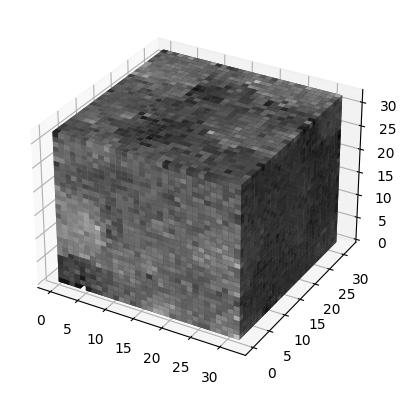

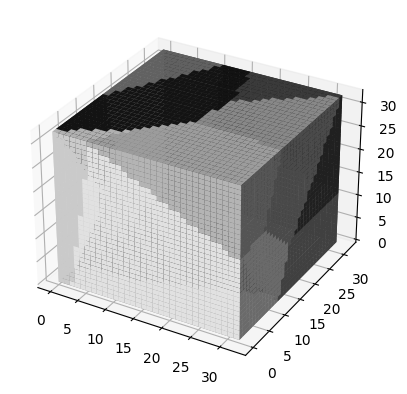

Training:   0%|          | 0/450 [00:00<?, ?it/s]

Validation:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2. Train loss: 0.2839032950376471, val loss: 1.0008920669555665, train score: 0, val score: 0
Output samples:



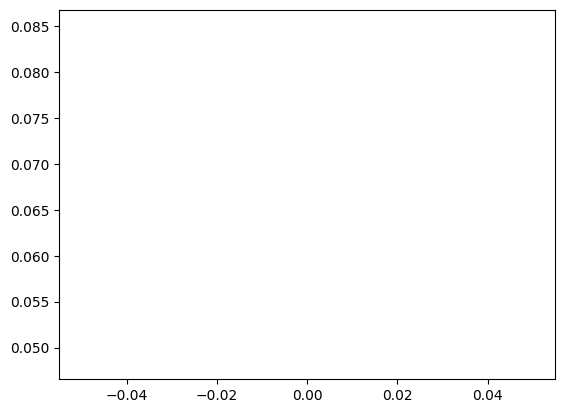

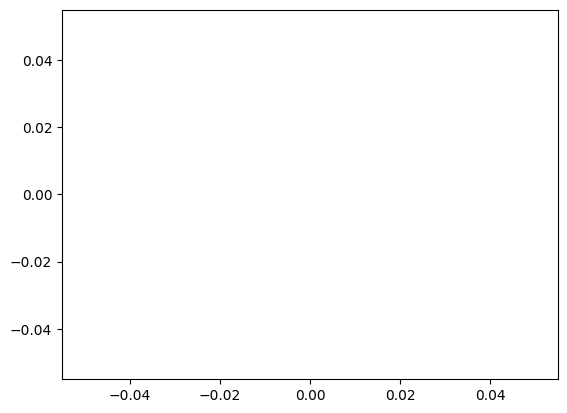

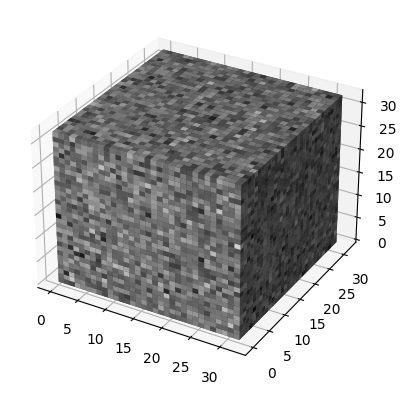

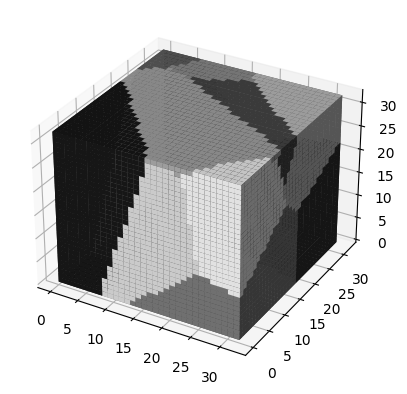

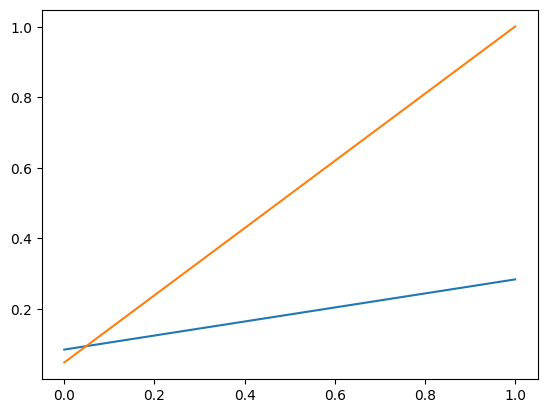

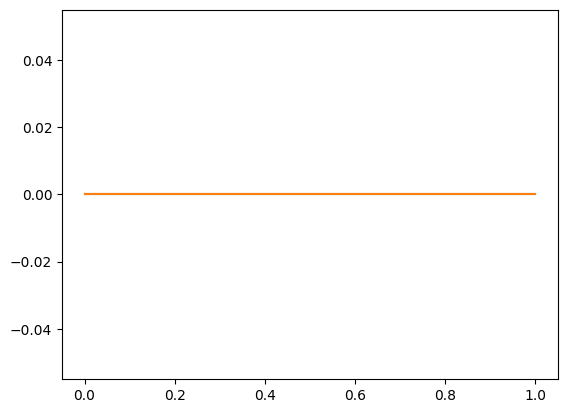

In [ ]:
trainer.train(model)